### Initial

In [1]:
import sys
import os
from collections import defaultdict
sys.path.append(os.path.abspath(os.path.join('..')))
from calc_agent.agent import *

dataset = load_dataset("ncbi/MedCalc-Bench-v1.0")
df = dataset["train"].to_pandas()  # or "test"
df_test = dataset["test"].to_pandas()  # or "test"

perc_df = df[df["Calculator Name"] == "PERC Rule for Pulmonary Embolism"]

perc_df_test = df_test[df_test["Calculator Name"] == "PERC Rule for Pulmonary Embolism"]

# Load dataset
dataset = load_dataset("ncbi/MedCalc-Bench-v1.0")
df = dataset["train"].to_pandas()  # or "test"
df_test = dataset["test"].to_pandas()  # or "test"
# Filter for calculator name "PERC"

perc_df = df[df["Calculator Name"] == "PERC Rule for Pulmonary Embolism"]

perc_df_test = df_test[df_test["Calculator Name"] == "PERC Rule for Pulmonary Embolism"]

wells_df = df[df["Calculator Name"] == "Wells' Criteria for Pulmonary Embolism"]

/Users/malthehli/Documents/ai_paper_tool/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/malthehli/Documents/ai_paper_tool/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Running the agent with different prompts

In [ ]:


this_prompt = (
    "Calculate the PERC score for this patient based on the 8 criteria below. "
 "Then, provide the output JSON object exactly matching this format (with no extra text):\n\n"
    "{\n"
    "  \"Answer\": <integer equal to the total number of false criteria (sum of false values)>\n"
    "}\n"
)

agent = CalculatorAgent(
    model_ids,
    calculator_name="perc",
    df=perc_df,
    prompt=this_prompt)
results_df_simple = await agent.run(use_df=perc_df)
agent = CalculatorAgent(
    model_ids,
    calculator_name="perc",
    df=perc_df,
    prompt_mode="enhanced_prompt"
)
results_df_enhanced = await agent.run(use_df=perc_df)
agent = CalculatorAgent(
    model_ids,
    calculator_name="perc",
    df=perc_df,
    prompt_mode="calculator"
)
results_df_calculator= await agent.run(use_df=perc_df)




Simple Prompt Results:


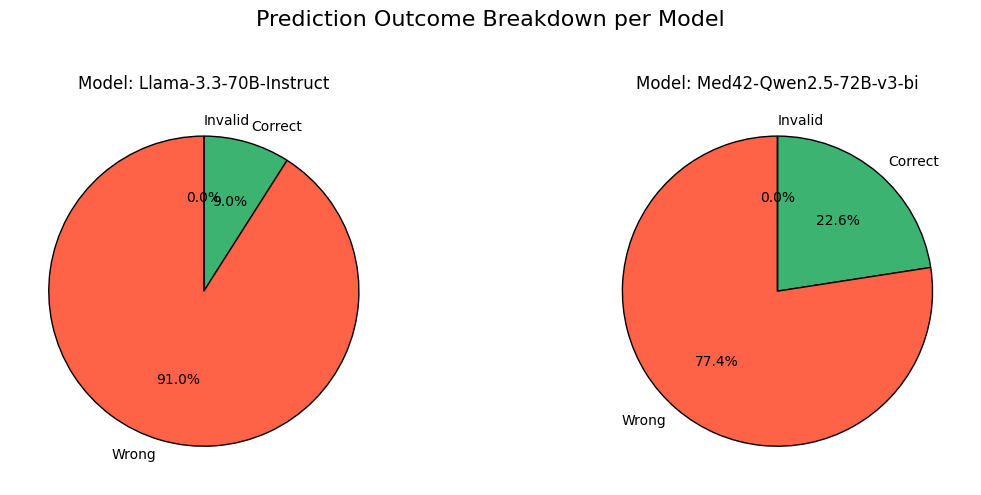

Enhanced Prompt Results:


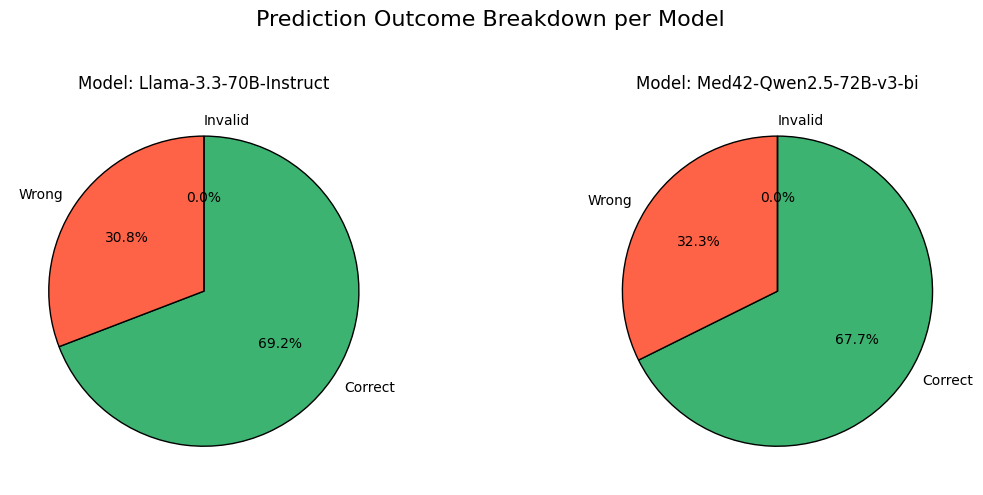

Computed Results:


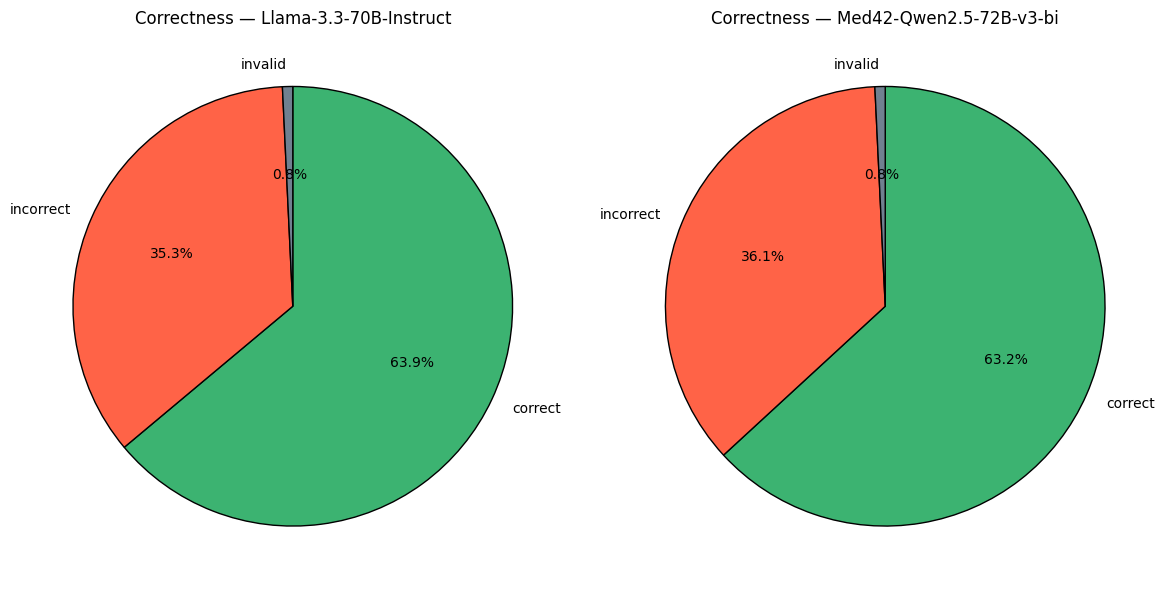

In [12]:

print("Simple Prompt Results:")
plot_df_pie(results_df_simple)
print("Enhanced Prompt Results:")
plot_df_pie(results_df_enhanced)
print("Computed Results:")
plot_correctness_calculated_pie(results_df_calculator, model_ids)




In [ ]:
this_prompt = (
    "Calculate the WELLS score for this patient. "
 "Then, provide the output JSON object exactly matching this format (with no extra text):\n\n"
    "{\n"
    "  \"Answer\": <integer equal to WELLS Score>\n"
    "}\n"
)

agent = CalculatorAgent(
    [model_ids[0]],
    calculator_name="wells",
    df=wells_df,
    prompt= this_prompt
)

results_df_simple_wells = await agent.run(use_df=wells_df)

agent = CalculatorAgent(
    [model_ids[0]],
    calculator_name="wells",
    df=wells_df,
    prompt_mode="enhanced_prompt" 
)

results_df_enhanced_wells = await agent.run(use_df=wells_df)
agent = CalculatorAgent(
    [model_ids[0]],
    calculator_name="wells",
    df=wells_df,
    prompt_mode="calculator" 
)

results_df_calculator_wells = await agent.run(use_df=wells_df)



=== Evaluating model: Llama-3.3-70B-Instruct ===



Computed Results:


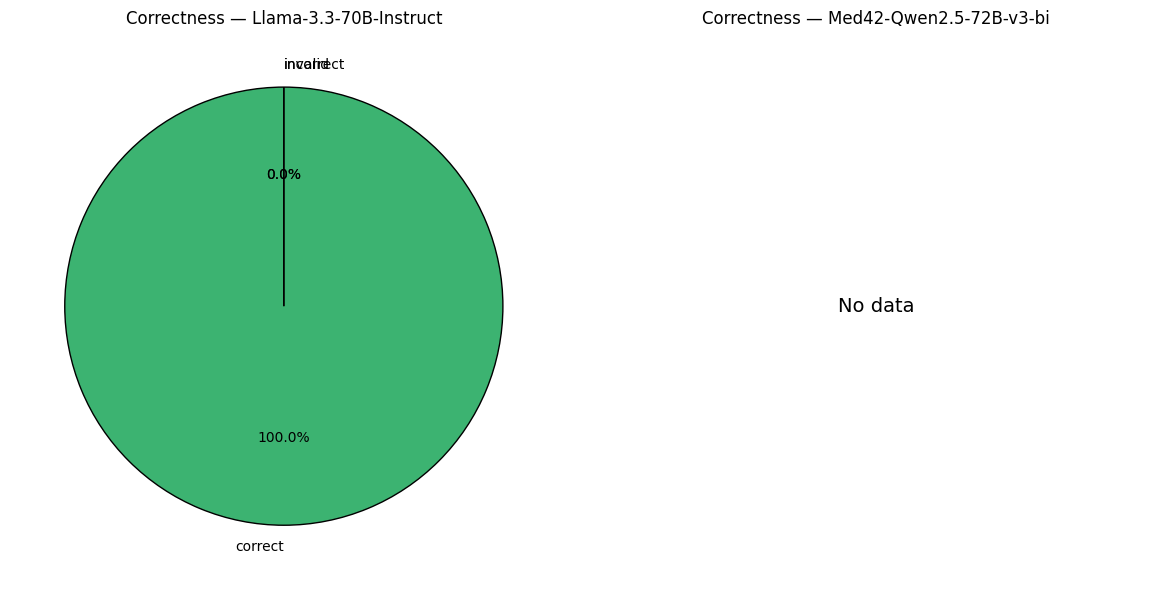

In [ ]:
print("Simple Prompt Results:")
plot_df_pie(results_df_simple_wells )
print("Enhanced Prompt Results:")
plot_df_pie(results_df_enhanced_wells)
print("Computed Results:")
plot_correctness_calculated_pie(results_df_calculator_wells, model_ids)